# COVID-19 Development in Hamburg, Germany

In [1]:
using Hamburg

In [2]:
using Dates, Plots, DataFrames, TimeSeries, StatsPlots, Statistics

using Plots
Plots.theme(:vibrant)

infected = dataset("covid-19", "infected")
DataFrames.head(infected, 5)

,deaths,hospitalizations,intensivecare,new,recordedat,recovered,total
,Int64?,Int64?,Int64?,Int64,Date,Int64?,Int64
1,241,62,14,114,2020-10-13,7200,9152
2,241,60,12,77,2020-10-12,7200,9040
3,241,60,12,52,2020-10-11,7100,8963
4,241,60,12,98,2020-10-10,7000,8911
5,241,60,12,145,2020-10-09,7000,8813


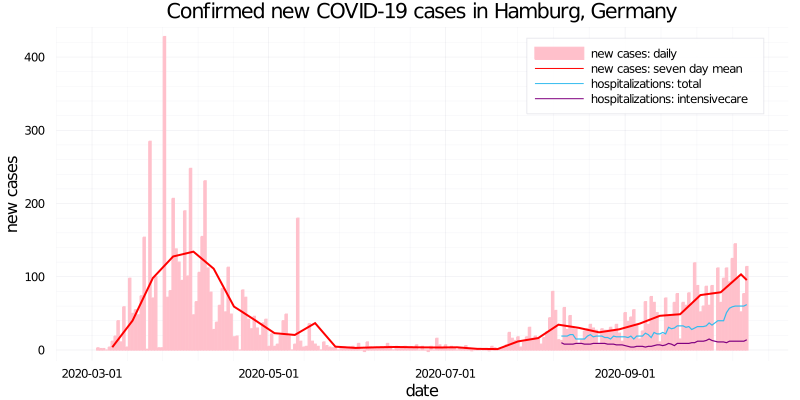

In [10]:
ta = TimeArray(infected.recordedat, convert.(Float64, infected.new), [:new])
collapsed = collapse(ta, week, last, mean)

@df infected bar(reverse(infected.recordedat), reverse(infected.new),
    linecolor=:pink,
    title="Confirmed new COVID-19 cases in Hamburg, Germany",
    ylabel="new cases",
    xlabel="date", 
    label="new cases: daily",
    c=:pink,
    size=(800,400))

plot!(collapsed, c=:red, label="new cases: seven day mean", lw=2)
plot!(reverse(infected.recordedat), reverse(infected.hospitalizations), label="hospitalizations: total")
plot!(reverse(infected.recordedat), reverse(infected.intensivecare), label="hospitalizations: intensivecare", c=:purple)

## New cases

The senate will need to decide on stricter measures if there are **900 or more** cases in the last seven days.

Sum of new cases in the last seven days:

In [4]:
lastweek = sum(infected[1:7, :].new)

704

## Hospitalizations (total)

## Development in the boroughs

In [5]:
boroughsovertime = dataset("covid-19", "boroughs")
boroughs = select(boroughsovertime, Not(:recordedat))
boroughsmatrix = convert(Matrix, boroughs)
boroughsovertime

,Altona,Bergedorf,Eimsbüttel,Hamburg Mitte,Hamburg Nord,Harburg,Wandsbek,recordedat
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Date
1,93,55,67,156,90,60,181,2020-10-12
2,63,39,58,94,109,70,156,2020-10-05
3,69,28,65,97,92,46,123,2020-09-28
4,79,31,83,98,143,43,181,2020-09-21
5,88,23,72,87,126,41,105,2020-09-14
6,79,17,59,88,90,21,73,2020-09-07
7,47,17,43,86,58,22,74,2020-08-31
8,49,15,38,111,36,39,67,2020-08-24
9,64,11,48,150,43,54,83,2020-08-17


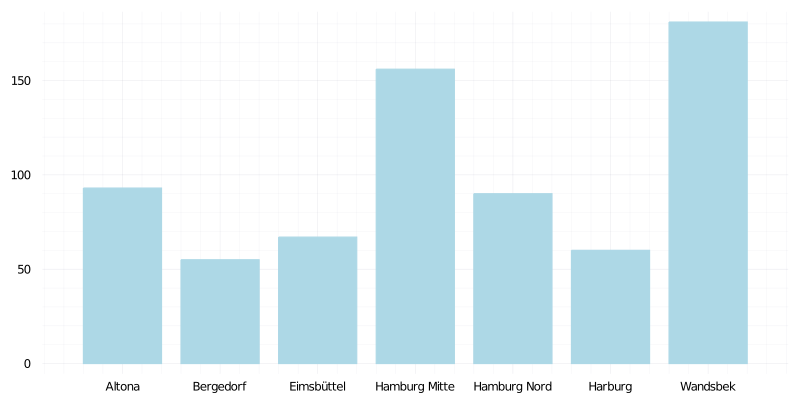

In [6]:
bar(names(boroughs), boroughsmatrix[1, :], size=(800,400), label=false, c=:lightblue, linecolor=:lightblue)

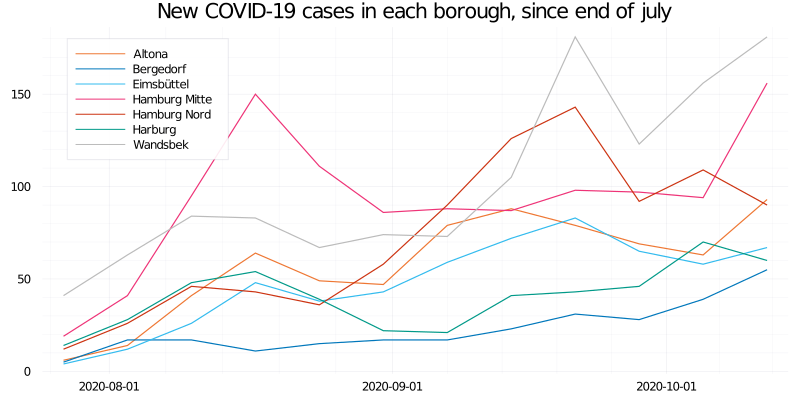

In [7]:
tb = TimeArray(boroughsovertime, timestamp=:recordedat)

plot(tb, legend=:topleft, size=(800,400))
plot!(title="New COVID-19 cases in each borough, since end of july")